In [1]:
import pandas as pd
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np

movie_data = "data/movie_dataset.csv"
read_data = pd.read_csv(movie_data)
read_data.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton


In [2]:
genres_list = []
seen_genres = set()
num = 0
for index, row in read_data.iterrows():
    try:
        splited_word = row["genres"].split()
        for i in splited_word:
            if i not in seen_genres:
                genres_list.append(i)
                seen_genres.add(i)        
    except:
        num = num + 1               
print(f"Number of movies without a genre {num}")


Number of movies without a genre 28


In [3]:
x_axis = np.arange(len(genres_list))
tick_locations = [value+0.4 for value in x_axis]
count_dict = {}
def count(gen, cnt):
    for index, row in read_data.iterrows():
        try:
            splited_word = row["genres"].split()
            for i in splited_word:
                if gen == i:
                    cnt = cnt + 1        
        except:
        
            pass
    
    return cnt

for genre in genres_list:
    count_dict[genre]=count(genre, 0)
count_dict


{'Action': 1029,
 'Adventure': 714,
 'Fantasy': 356,
 'Science-Fiction': 476,
 'Crime': 593,
 'Drama': 1875,
 'Thriller': 1073,
 'Animation': 207,
 'Family': 426,
 'Western': 66,
 'Comedy': 1386,
 'Romance': 731,
 'Horror': 418,
 'Mystery': 295,
 'History': 166,
 'War': 132,
 'Music': 143,
 'Documentary': 96,
 'Foreign': 34,
 'TV-Movie': 5}

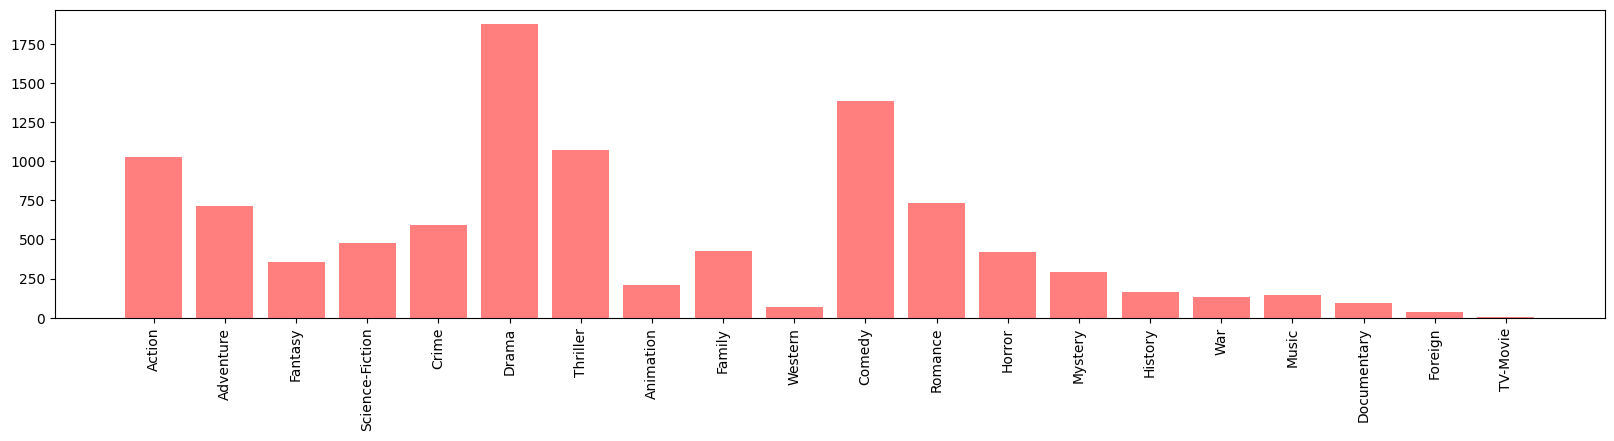

In [4]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, count_dict.values(), color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, count_dict.keys(), rotation="vertical")
plt.show()
    

In [ ]:
df = read_data.copy()
df["year"] = ""

# Create a DataFrame
df = pd.DataFrame(read_data)

# Initialize a dictionary to track # of years
year_count = {}

# Loop through all rows
for date in df["release_date"]:
    try:
        # Pull year from the date string
        year = int(date.split('-')[2])

        # Tally the counts
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    except Exception as e:
        print(f"Skipping invalid date: {date}")

print("Movies released by year:")
print(year_count)

Skipping invalid date: nan
Movies released by year:
{2009: 197, 2007: 159, 2015: 192, 2012: 172, 2010: 191, 2016: 92, 2006: 205, 2008: 176, 2013: 200, 2011: 196, 2014: 196, 2005: 189, 1997: 97, 2004: 168, 1999: 139, 1995: 61, 2003: 136, 2001: 147, 2002: 162, 1998: 112, 2000: 142, 1990: 27, 1991: 26, 1994: 46, 1996: 79, 1982: 20, 1993: 39, 1992: 28, 1989: 25, 1984: 26, 1988: 28, 1978: 12, 1962: 7, 1980: 18, 1981: 28, 1968: 10, 1985: 21, 1940: 5, 1963: 8, 1987: 25, 1973: 9, 1983: 22, 1979: 13, 1976: 8, 1986: 20, 1977: 13, 1970: 11, 1971: 10, 1969: 10, 1960: 3, 1965: 6, 1964: 10, 1927: 1, 1974: 7, 1975: 6, 1967: 4, 1951: 3, 1972: 6, 1961: 5, 1946: 3, 1953: 4, 1954: 4, 1959: 3, 1932: 1, 1947: 2, 1956: 3, 1945: 4, 1952: 4, 1930: 1, 1966: 4, 1939: 3, 1950: 1, 1948: 3, 1958: 1, 1957: 2, 1944: 2, 1938: 2, 1949: 2, 1936: 2, 2017: 1, 1937: 1, 1941: 1, 1955: 2, 1942: 2, 1929: 2, 1935: 1, 1933: 2, 1916: 1, 1934: 1, 1925: 1}


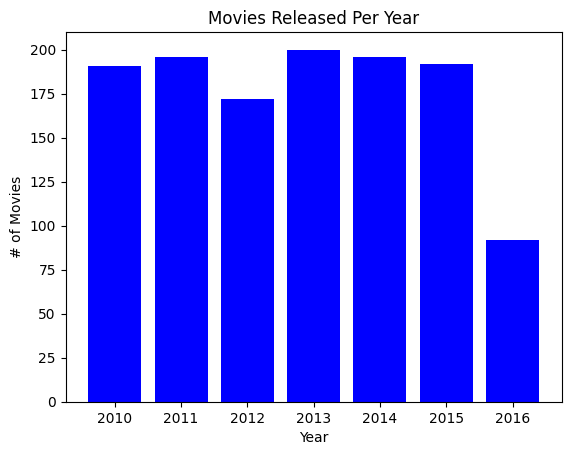

In [ ]:
#Create an array, data only goes up to 2017 (2017 only had 1 movie)
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
movie_count = [191, 196, 172, 200, 196, 192, 92]

# Create an x-axis array
x_axis = np.arange(len(years))

# Plot the bar chart
plt.bar(x_axis, movie_count, color="b", align="center")

# Set title, label, and ticks
plt.xticks(x_axis, years)
plt.xlabel("Year")
plt.ylabel("# of Movies")
plt.title("Movies Released Per Year")

# Display the plot
plt.show()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

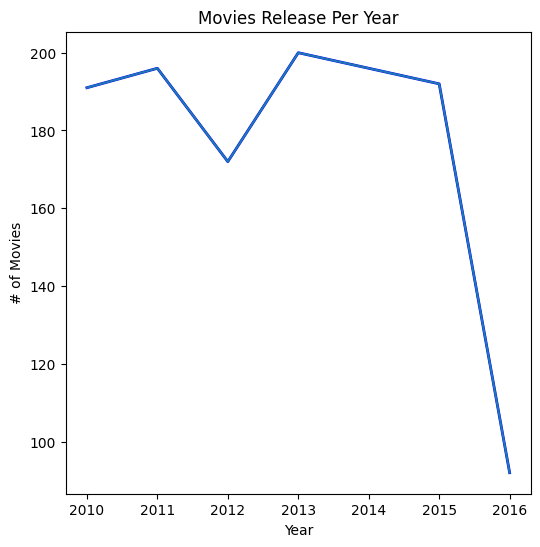

In [ ]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
movie_count = [191, 196, 172, 200, 196, 192, 92]

#Set title, labels, and ticks
fig, ax1 = plt.subplots (figsize = (6,6))
plt.plot(x_axis, movie_count, linewidth = 2, color = "blue", label = "# of Movies")
plt.xlabel("Year")
plt.ylabel("# of Movies")
plt.xticks(x_axis, years)
plt.title("Movies Released Per Year")

# Display line graph
plt.plot(x_axis, movie_count)
plt.plot